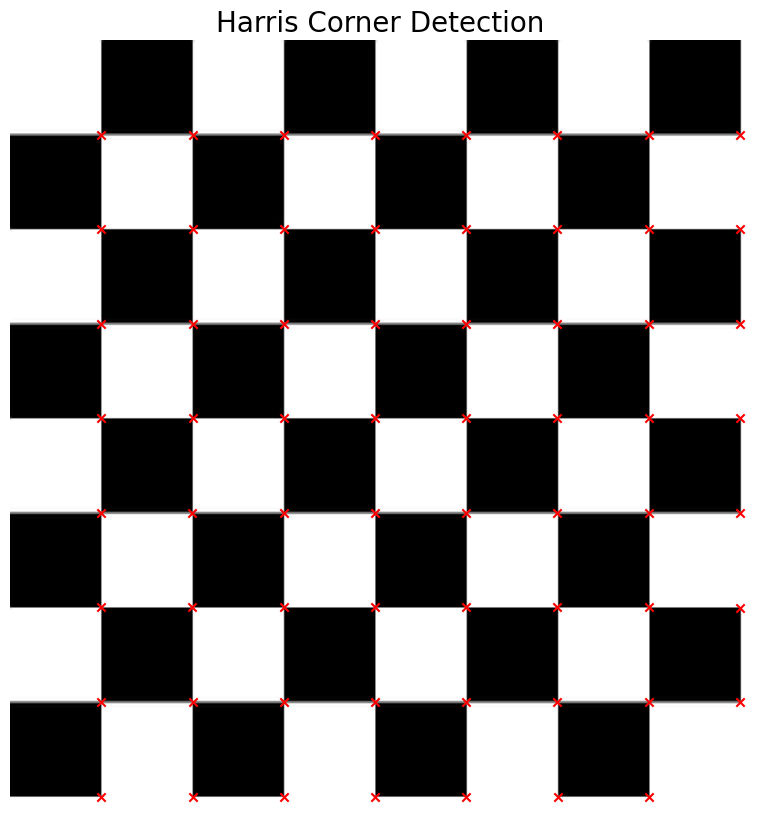

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature, io, color, filters
from skimage.io import imread
from skimage.feature import corner_harris, corner_peaks, corner_subpix
import os

# Bước 1: Đọc ảnh và chuyển sang RGB (nếu là RGBA)
img = imread('images/chess.png')  # Đọc ảnh
if img.shape[2] == 4:  # Kiểm tra nếu ảnh có 4 kênh (RGBA)
    img = img[:, :, :3]  # Loại bỏ kênh alpha và chỉ lấy 3 kênh RGB

# Chuyển ảnh RGB thành grayscale
img_gray = color.rgb2gray(img)  # Chuyển ảnh sang grayscale

# Bước 2: Phát hiện các góc trong ảnh sử dụng Harris Corner Detection
corners = corner_harris(img_gray)  # Tính toán Harris corner response

# Bước 3: Phát hiện các góc từ giá trị corner response
# Lọc các góc có corner response lớn hơn ngưỡng
coordinates = corner_peaks(corners, min_distance=5, threshold_rel=0.01)

# Bước 4: Tinh chỉnh các tọa độ góc (subpixel accuracy)
coordinates_subpix = corner_subpix(img_gray, coordinates, window_size=9)

# Bước 5: Vẽ các góc trên ảnh đã xử lý (vẽ điểm góc lên ảnh xám)
img_with_corners = img_gray.copy()
plt.figure(figsize=(10, 10))
plt.imshow(img_with_corners, cmap='gray')
plt.scatter(coordinates_subpix[:, 1], coordinates_subpix[:, 0], c='red', marker='x')
plt.title("Harris Corner Detection", size=20)
plt.axis('off')
plt.show()

# Bước 6: Lưu ảnh đã xử lý (với các điểm góc)
output_folder = 'output_images'
output_path_with_corners = os.path.join(output_folder, 'chuong_7(3).png')

plt.imsave(output_path_with_corners, img_with_corners, cmap='gray')  # Lưu ảnh đã phát hiện góc